In [1]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(10, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S', 'NS']
for term in terms:
    sub = dtf[dtf['Summer?'] == term]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['GPA Received'], hist = False, norm_hist = True, 
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 0.03},
               label = temp)

plt.legend(prop={'size': 16})
plt.title('Probability Density Plot of GPA Distribution',fontsize = 15)
plt.xlabel('GPA Received',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()

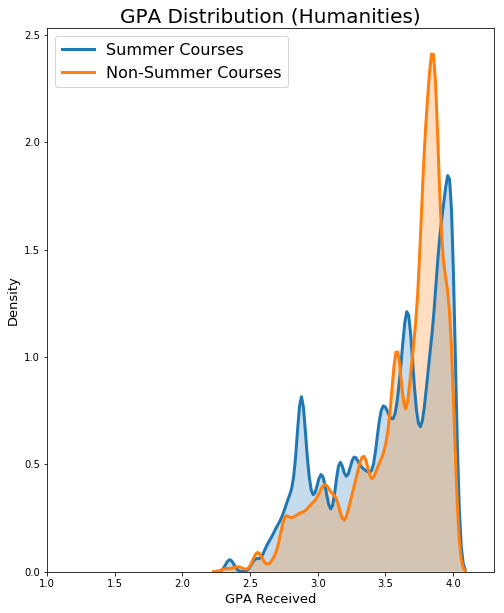

In [2]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(8, 10))
dtf = make_pandas('humanities.txt')
terms = ['S', 'NS']
for term in terms:
    sub = dtf[dtf['Summer?'] == term]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['GPA Received'], hist = False, norm_hist = True,
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 0.03},
               label = temp)

plt.legend(prop={'size': 16})
plt.title('GPA Distribution (Humanities)',fontsize = 20)
plt.xlabel('GPA Received',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlim(1.0, 4.3)
plt.show()

Text(0.5,1,u'Side-by-Side Histogram of GPA Distribution')

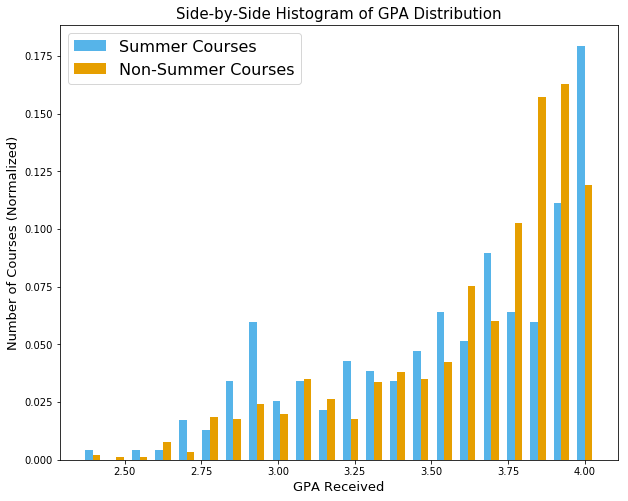

In [3]:
fig=plt.figure(figsize=(10, 8))

x1 = list(dtf[dtf['Summer?'] == 'S']['GPA Received'])
x2 = list(dtf[dtf['Summer?'] == 'NS']['GPA Received'])
weights = [np.ones_like(x1)/float(len(x1)), np.ones_like(x2)/float(len(x2))]

colors = ['#56B4E9', '#E69F00']
names = ['Summer Courses', 'Non-Summer Courses']

plt.hist([x1,x2], bins = 22, weights = weights, color = colors, label = names, align = 'right', rwidth = 0.65)

plt.legend(prop={'size': 16})
plt.xlabel('GPA Received',fontsize=13)
plt.ylabel('Number of Courses (Normalized)',fontsize=13)
plt.title('Side-by-Side Histogram of GPA Distribution',fontsize = 15)

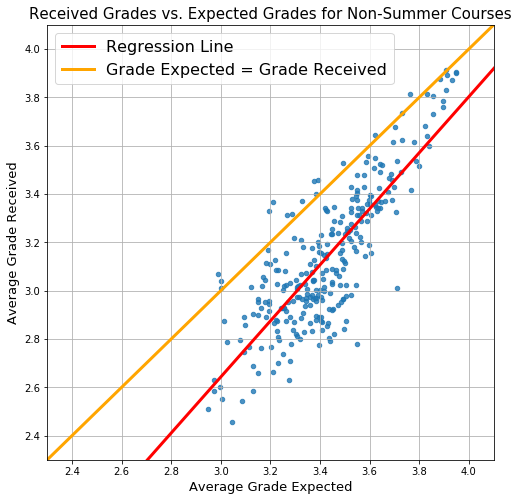

('slope:', 1.1597761578069803, 'intercept:', -0.8363981598296779, 'r_value:', 0.8211129913902699, 'p_value:', 1.2740696276729262e-71)


In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from analysis_modules import *

summer = 'NS' #'S' or 'NS'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()
expected = []
received = []
for name in names:
    expected.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Expected'].mean())
    received.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Received'].mean())
GPA_dtf = pd.DataFrame({'Course Name': names, 'Avg. GPA Expected': expected, 'Avg. GPA Received': received})


slope, intercept, r_value, p_value, std_err = stats.linregress(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Received'])

values = [slope * i + intercept for i in [2.3, 4.2]]

fig=plt.figure(figsize=(8, 8))
plt.scatter(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Received'], s=20, alpha=0.8, label=None)
plt.plot([2.3, 4.2], values, 'b', c='red', label = 'Regression Line', linewidth=3)
plt.plot([2.3, 4.2], [2.3, 4.2], 'orange', label = 'Grade Expected = Grade Received',linewidth=3)
if summer == 'S':
    plt.title("Received Grades vs. Expected Grades for Summer Courses",fontsize = 15)
else:
    plt.title("Received Grades vs. Expected Grades for Non-Summer Courses",fontsize = 15)
plt.xlabel('Average Grade Expected',fontsize=13)
plt.ylabel('Average Grade Received',fontsize=13)
plt.xlim(2.3, 4.1)
plt.ylim(2.3, 4.1)
plt.legend(prop={'size': 16})
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

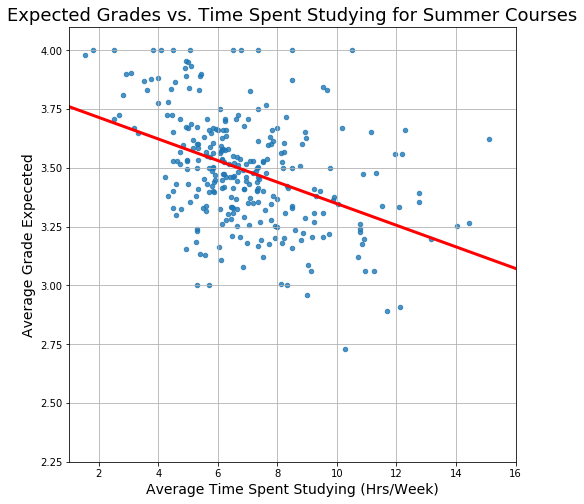

('slope:', -0.045877020201119514, 'intercept:', 3.806609298317932, 'r_value:', -0.4246368377616319, 'p_value:', 4.899641934065257e-14)


In [17]:
# plot for grade vs time spent studying recommendation
summer = 'S' #'S' or 'NS'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()
hours = []
received = []
for name in names:
    hours.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['Hrs/Week'].mean())
    received.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Received'].mean())
hrs_dtf = pd.DataFrame({'Course Name': names, 'Avg. Hours': hours, 'Avg. GPA Received': received})


slope, intercept, r_value, p_value, std_err = stats.linregress(hrs_dtf['Avg. Hours'], hrs_dtf['Avg. GPA Received'])

values = [slope * i + intercept for i in [0, 17]]

fig=plt.figure(figsize=(8, 8))
plt.scatter(hrs_dtf['Avg. Hours'], hrs_dtf['Avg. GPA Received'], s=20, alpha=0.8, label=None)
plt.plot([0, 17], values, 'b', c='red', label = 'Regression Line', linewidth=3)
plt.title("Received Grades vs. Time Spent Studying for Summer Courses",fontsize = 18)
plt.xlabel('Average Time Spent Studying (Hrs/Week)',fontsize=14)
plt.ylabel('Average Grade Received',fontsize=14)
plt.xlim(1, 16)
plt.ylim(2.25, 4.1)
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

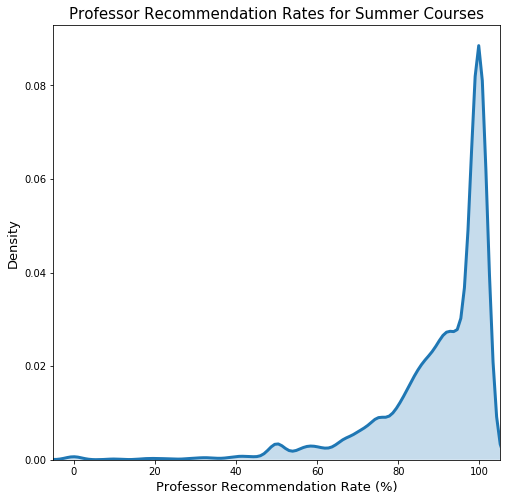

In [6]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(8, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S']
for term in terms:
    sub = dtf[(dtf['Summer?'] == term)]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['Recommend Prof %'], hist = False, norm_hist = True, 
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 2},
               )

plt.title('Professor Recommendation Rates for Summer Courses',fontsize = 15)
plt.xlabel('Professor Recommendation Rate (%)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlim(-5, 105)
plt.show()

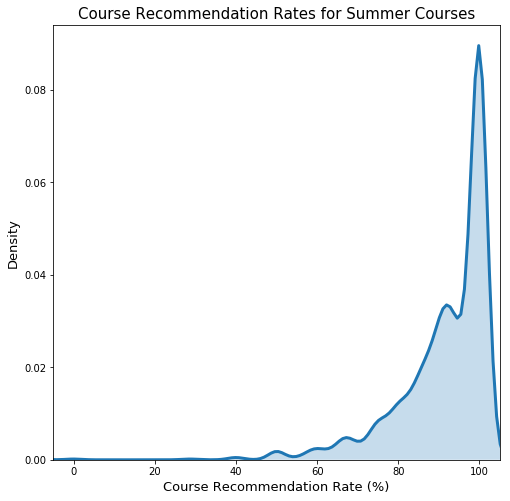

In [7]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(8, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S']
for term in terms:
    sub = dtf[(dtf['Summer?'] == term)]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['Recommend Class %'], hist = False, norm_hist = True, 
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 2},
               )

plt.title('Course Recommendation Rates for Summer Courses',fontsize = 15)
plt.xlabel('Course Recommendation Rate (%)',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlim(-5, 105)
plt.show()

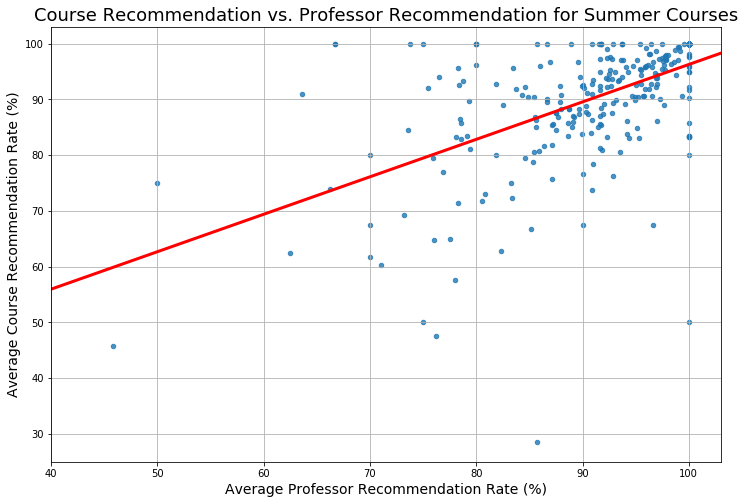

('slope:', 0.6717551692035415, 'intercept:', 29.09028881570722, 'r_value:', 0.5520318357857595, 'p_value:', 2.265531028224549e-24)


In [10]:
# plot for course vs professor recommendation
summer = 'S'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()
prof = []
received = []
for name in names:
    prof.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['Recommend Prof %'].mean())
    received.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['Recommend Class %'].mean())
prof_dtf = pd.DataFrame({'Course Name': names, 'Avg. Prof': prof, 'Avg. GPA Received': received})


slope, intercept, r_value, p_value, std_err = stats.linregress(prof_dtf['Avg. GPA Received'], prof_dtf['Avg. Prof'])

values = [slope * i + intercept for i in [40,110]]

fig=plt.figure(figsize=(12, 8))
plt.scatter(prof_dtf['Avg. GPA Received'], prof_dtf['Avg. Prof'], s=20, alpha=0.8, label=None)
plt.plot([40, 110], values, 'b', c='red', label = 'Regression Line', linewidth=3)
plt.title("Course Recommendation vs. Professor Recommendation for Summer Courses",fontsize = 18)
plt.xlabel('Average Professor Recommendation Rate (%)',fontsize=14)
plt.ylabel('Average Course Recommendation Rate (%)',fontsize=14)
plt.xlim(40, 103)
plt.ylim(25, 103)
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

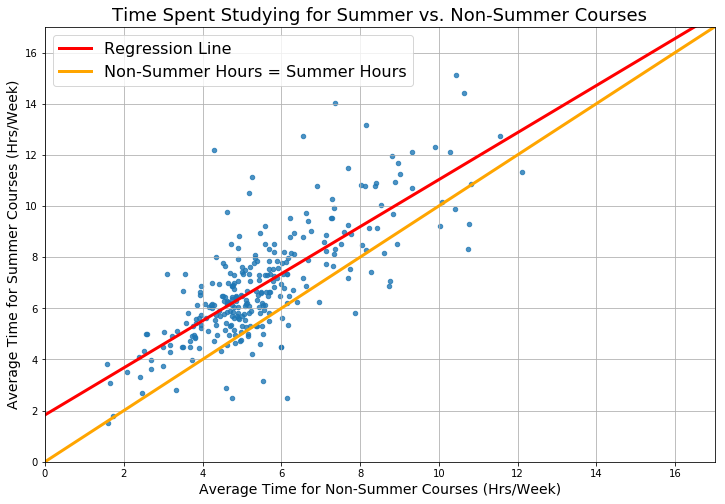

('slope:', 0.9197865523618276, 'intercept:', 1.8321407979931719, 'r_value:', 0.7620951830160655, 'p_value:', 6.282726678856156e-56)


In [25]:
# plot for hrs spent in summer vs non-summer
summer = 'S'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()
sum_hrs = []
nsum_hrs = []
for name in names:
    sum_hrs.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['Hrs/Week'].mean())
    nsum_hrs.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == 'NS')]['Hrs/Week'].mean())
hrs_dtf = pd.DataFrame({'Course Name': names, 'Summer Hrs': sum_hrs, 'NSummer Hrs': nsum_hrs})


slope, intercept, r_value, p_value, std_err = stats.linregress(hrs_dtf['NSummer Hrs'], hrs_dtf['Summer Hrs'])

values = [slope * i + intercept for i in [0,17]]

fig=plt.figure(figsize=(12, 8))
plt.scatter(hrs_dtf['NSummer Hrs'], hrs_dtf['Summer Hrs'], s=20, alpha=0.8, label=None)
plt.plot([0, 17], values, 'b', c='red', label = 'Regression Line', linewidth=3)
plt.plot([0, 17], [0, 17], 'orange', label = 'Non-Summer Hours = Summer Hours',linewidth=3)
plt.title("Time Spent Studying for Summer vs. Non-Summer Courses",fontsize = 18)
plt.ylabel('Average Time for Summer Courses (Hrs/Week)',fontsize=14)
plt.xlabel('Average Time for Non-Summer Courses (Hrs/Week)',fontsize=14)
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.legend(prop={'size': 16})
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)